## 얼굴임베딩 만들기(1) 얼굴인식

### 데이터 준비하기

file_list: ['trump.jpg', 'biden.jpg', 'bush.jpeg', 'reagan.jpg', 'clinton.jpeg', 'obama.jpg']


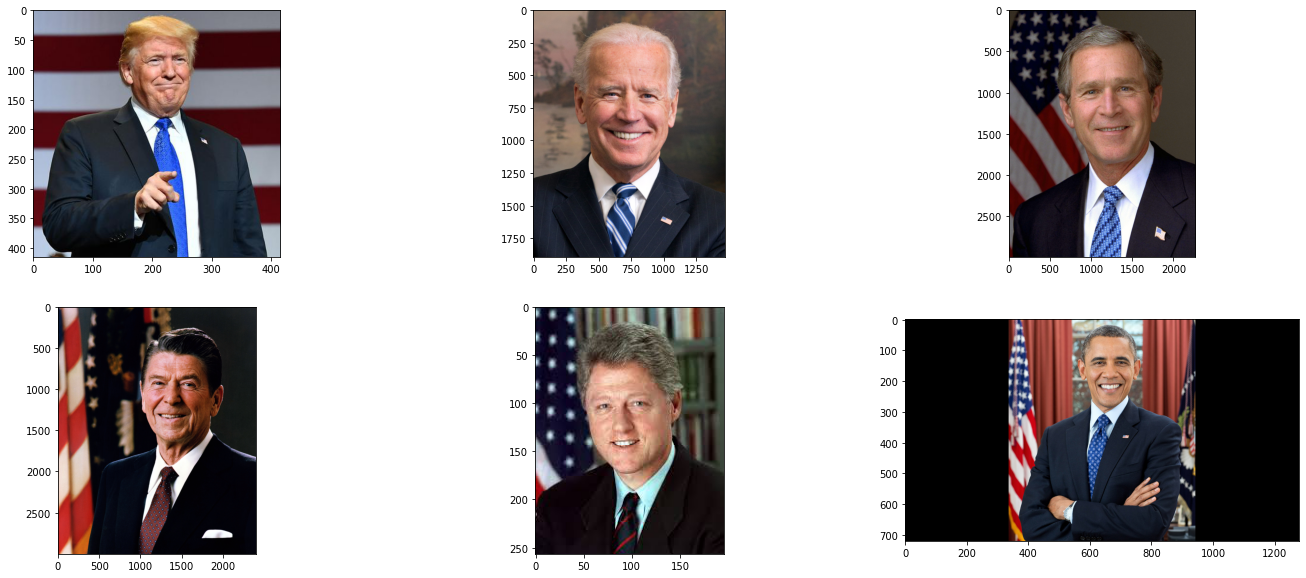

In [1]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

[(98, 758, 284, 572)]


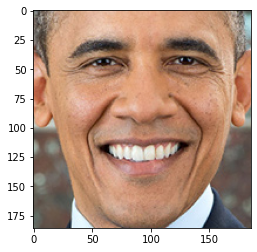

In [2]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/obama.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

In [3]:
import face_recognition
import os

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

print('**')

**


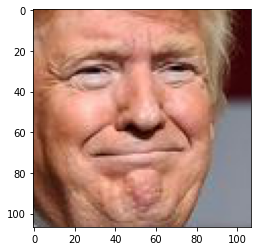

In [4]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/trump.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

## 얼굴임베딩 만들기(2) FaceNet

In [5]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['trump.jpg', 'biden.jpg', 'bush.jpeg', 'reagan.jpg', 'clinton.jpeg', 'obama.jpg']


In [6]:
image_file = os.path.join(dir_path, 'obama.jpg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.08126248,  0.11014761, -0.01082448, -0.05268792,  0.01033717,
        -0.00813808, -0.07251769, -0.0922646 ,  0.19304723, -0.09246384,
         0.23908533,  0.06770287, -0.22123125, -0.14119367,  0.05562152,
         0.13705511, -0.17924425, -0.07232306, -0.11183281, -0.11370818,
         0.03956435, -0.01019115,  0.0942178 ,  0.04493114, -0.12757549,
        -0.34449592, -0.05374938, -0.17703305,  0.00868226, -0.09721592,
        -0.09817187,  0.00278232, -0.17721367, -0.12789807,  0.03489833,
        -0.01991234, -0.00838933, -0.00132862,  0.18308581,  0.02447568,
        -0.1237656 ,  0.09957044,  0.02323568,  0.22983313,  0.2838524 ,
         0.06655717, -0.00558912, -0.09833544,  0.10058986, -0.23476946,
         0.06006292,  0.1341591 ,  0.08373027,  0.03900504,  0.10194533,
        -0.19337648,  0.01717628,  0.08978969, -0.16005114,  0.01892098,
         0.03082444, -0.06051281, -0.04526773,  0.04633342,  0.20678686,
         0.10299795, -0.12437531, -0.0490516 ,  0.1

In [7]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            
    return embedding_dict                

In [8]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['trump']

array([-0.15962467,  0.20268655,  0.0323635 ,  0.02439232, -0.06226439,
        0.05140705,  0.07351795, -0.16823348,  0.06962204, -0.05557961,
        0.17270109, -0.05094168, -0.35293093, -0.0316438 ,  0.03792984,
        0.17343847, -0.13260126, -0.15357377, -0.23523533, -0.08442692,
       -0.00134139,  0.03210667, -0.08926154, -0.02670781, -0.09581181,
       -0.25792354, -0.01056999, -0.11071672,  0.03133569, -0.07444921,
        0.05670552, -0.02273796, -0.19461137, -0.04576054,  0.00947582,
        0.01806056, -0.1502624 , -0.07787319,  0.17577608,  0.01933258,
       -0.19744575, -0.03930519,  0.07374467,  0.20196027,  0.1476755 ,
       -0.0141539 ,  0.0172476 , -0.11976205,  0.09462971, -0.24318144,
       -0.02755127,  0.12169892,  0.14837705,  0.17079785,  0.06952555,
       -0.15360466,  0.02005427,  0.08199155, -0.19544823,  0.10653654,
        0.11468476, -0.21902837, -0.07677591, -0.06791042,  0.10587606,
        0.05921567, -0.06115703, -0.11171092,  0.23917492, -0.15

## 얼굴임베딩 사이의 거리측정

In [9]:
import numpy as np

A = np.array([0.0019173615146428347, 0.17689529061317444, 0.0763588473200798, -0.024574430659413338, -0.13141091167926788, 0.0344821996986866, -0.0374063216149807, -0.07056370377540588, 0.048655178397893906, -0.03414120525121689, 0.22696012258529663, -0.061402369290590286, -0.24329672753810883, -0.039421431720256805, 0.0621466189622879, 0.1220191940665245, -0.1616966724395752, -0.06176016479730606, -0.18894734978675842, -0.06051916256546974, -0.010404378175735474, -0.05918719246983528, 0.02205268107354641, -0.06932859122753143, -0.20260301232337952, -0.2425234317779541, -0.04454419016838074, -0.11400106549263, -0.02022719383239746, -0.15134216845035553, 0.07622595876455307, -0.0323314443230629, -0.1404413878917694, -0.056338660418987274, -0.04520038887858391, -0.026131991297006607, -0.0352761372923851, -0.0679447203874588, 0.1318240910768509, 0.034210119396448135, -0.17475582659244537, 0.13853909075260162, -0.0027398746460676193, 0.227312833070755, 0.3029572069644928, 0.004932125099003315, 0.05853061378002167, -0.07521739602088928, 0.1443275809288025, -0.2340908795595169, 0.030092637985944748, 0.040133409202098846, 0.1672351360321045, 0.05728958174586296, 0.11475440859794617, -0.07548368722200394, 0.040267568081617355, 0.16487033665180206, -0.21067440509796143, 0.036163005977869034, 0.051559075713157654, -0.05994952470064163, 0.029524143785238266, -0.04122130945324898, 0.13074155151844025, 0.1142958477139473, -0.00561982998624444, -0.09740489721298218, 0.18533651530742645, -0.10422169417142868, -0.11409182846546173, 0.02283927984535694, -0.08339140564203262, -0.13673236966133118, -0.3275497853755951, -0.0002689119428396225, 0.2842463254928589, 0.13883619010448456, -0.29149484634399414, -0.07276060432195663, -0.03179163485765457, 0.011192545294761658, 0.03802505508065224, 0.03392524644732475, -0.03972085565328598, -0.12013585865497589, -0.06272879987955093, -0.026893358677625656, 0.2430601865053177, -0.12022019177675247, -0.010466678068041801, 0.20199882984161377, 0.051095910370349884, -0.13243277370929718, 0.06056740880012512, -0.04802423343062401, -0.12318279594182968, -0.013157366774976254, -0.12076889723539352, -0.07183175534009933, -0.01982908323407173, -0.15032584965229034, -0.026652328670024872, 0.06820419430732727, -0.24668177962303162, 0.1818322390317917, -0.01959969662129879, -0.07208395004272461, -0.0680316612124443, -0.038368165493011475, 0.021410271525382996, 0.06388168036937714, 0.2293335199356079, -0.22541724145412445, 0.19133104383945465, 0.24343697726726532, -0.04034627974033356, 0.07534503191709518, 0.017645064741373062, 0.054646339267492294, -0.046512290835380554, 0.07076910138130188, -0.0960201621055603, -0.12610889971256256, -0.017934376373887062, -0.010262779891490936, 0.01885927841067314, 0.057148948311805725])

B = np.array([-0.08116298168897629, 0.1283080279827118, 0.024102725088596344, -0.03748808428645134, 0.06578215956687927, -0.07137967646121979, -0.10578329861164093, -0.0911930501461029, 0.19589228928089142, -0.09603863954544067, 0.2447616308927536, 0.07736924290657043, -0.17048686742782593, -0.1277867704629898, 0.06390697509050369, 0.12272421270608902, -0.19242052733898163, -0.08341517299413681, -0.11065894365310669, -0.09501136839389801, -0.010332206264138222, -0.008188878186047077, 0.08251037448644638, 0.04358505830168724, -0.1455313265323639, -0.3595622479915619, -0.07877802848815918, -0.18927346169948578, -0.0018955999985337257, -0.06280332803726196, -0.06073163449764252, 0.03181075677275658, -0.15109844505786896, -0.08682074397802353, 0.017340943217277527, -0.020879391580820084, 0.008258359506726265, 0.016738882288336754, 0.16803768277168274, 0.039162665605545044, -0.09613757580518723, 0.06231086328625679, 0.00924085732549429, 0.2418847680091858, 0.26051488518714905, 0.07355985790491104, 0.05239278823137283, -0.08052310347557068, 0.08884726464748383, -0.24261267483234406, 0.05618546903133392, 0.12175332009792328, 0.09056758135557175, 0.04266638681292534, 0.16591356694698334, -0.2005864679813385, 0.01018378883600235, 0.08819808065891266, -0.15550008416175842, 0.0815843716263771, 0.03018287755548954, -0.025435002520680428, -0.06714558601379395, 0.009693139232695103, 0.22243273258209229, 0.13470745086669922, -0.1363328993320465, 0.01635543815791607, 0.18212205171585083, -0.03392908349633217, 0.0398673489689827, 0.0043264636769890785, -0.15493592619895935, -0.2530894875526428, -0.23155181109905243, 0.0678660124540329, 0.31580865383148193, 0.21846994757652283, -0.20842058956623077, 0.012199334800243378, -0.12194785475730896, 0.059383176267147064, 0.0768171101808548, -0.012840969488024712, -0.11975857615470886, -0.11892750859260559, -0.03087366186082363, 0.04432998597621918, 0.09186872839927673, 0.0821407362818718, -0.018520792946219444, 0.1962793618440628, -0.0566205158829689, 0.026071354746818542, 0.007139421068131924, 0.02185123600065708, -0.11292634904384613, -0.044381096959114075, -0.18024618923664093, -0.007845945656299591, 0.010368190705776215, -0.07480168342590332, -0.0035089245066046715, 0.09972234815359116, -0.18773995339870453, 0.0474785715341568, 0.025760797783732414, -0.042169712483882904, 0.0014017894864082336, 0.1201503798365593, -0.05088714882731438, -0.02051539719104767, 0.0884844958782196, -0.2176845818758011, 0.25695914030075073, 0.23358485102653503, 0.019985560327768326, 0.17838242650032043, 0.029055196791887283, 0.04518195986747742, -0.044122979044914246, -0.043431997299194336, -0.15906637907028198, -0.07155231386423111, 0.02525237947702408, 0.02502967044711113, 0.04127159342169762, 0.011846683919429779])

C = np.array([-0.0762145072221756, 0.09951083362102509, 0.0012626983225345612, -0.05529194697737694, -0.006535547785460949, -0.012212716042995453, -0.07667708396911621, -0.07388101518154144, 0.18756520748138428, -0.07589773088693619, 0.2424328476190567, 0.06438330560922623, -0.22197730839252472, -0.13409815728664398, 0.046808283776044846, 0.14692817628383636, -0.1844339370727539, -0.051137253642082214, -0.1149090975522995, -0.1297808736562729, 0.040612753480672836, -0.002555673476308584, 0.10426937788724899, 0.026295233517885208, -0.13127824664115906, -0.35947439074516296, -0.048153407871723175, -0.17165206372737885, -0.0002263905480504036, -0.10254599899053574, -0.08338439464569092, 0.014203382655978203, -0.18179851770401, -0.13200539350509644, 0.03813670203089714, -0.012789442203938961, -0.0030085663311183453, -0.007307708729058504, 0.17558619379997253, 0.025768719613552094, -0.12877899408340454, 0.11051110923290253, 0.03616628795862198, 0.22539083659648895, 0.2838597595691681, 0.07483825087547302, -0.0036694444715976715, -0.09967216849327087, 0.11106447875499725, -0.22961333394050598, 0.06397823244333267, 0.12394970655441284, 0.06568531692028046, 0.037825535982847214, 0.09586739540100098, -0.18721607327461243, 0.01674063131213188, 0.10057111084461212, -0.15766742825508118, 0.008397659286856651, 0.039109550416469574, -0.06041106954216957, -0.046033550053834915, 0.031240269541740417, 0.2121172845363617, 0.103468157351017, -0.1224282756447792, -0.05559460073709488, 0.12153220176696777, -0.018480442464351654, 0.039875734597444534, 0.007489997893571854, -0.18950346112251282, -0.20904967188835144, -0.23732705414295197, 0.0895664244890213, 0.3778454661369324, 0.16606193780899048, -0.20442475378513336, 0.018602905794978142, -0.18367978930473328, 0.04945264756679535, 0.08889186382293701, 0.002995049115270376, -0.06196683272719383, -0.13028381764888763, -0.03548961132764816, 0.053789377212524414, 0.08386979252099991, 0.016627438366413116, -0.040179431438446045, 0.2289249151945114, -0.02149147540330887, 0.05046383664011955, 0.02314644865691662, 0.05424635857343674, -0.1627081036567688, -0.01140156015753746, -0.18031321465969086, -0.06785157322883606, 0.03336677327752113, -0.06467186659574509, 0.0466950424015522, 0.12832939624786377, -0.2377130389213562, 0.06774994730949402, 0.013810726813971996, -0.019034255295991898, 0.04477768391370773, 0.0660984218120575, -0.031004268676042557, -0.03275192156434059, 0.06632497161626816, -0.24120087921619415, 0.2647172510623932, 0.2477877289056778, 0.054315339773893356, 0.17328208684921265, 0.06950142979621887, 0.019016757607460022, -0.01211759727448225, -0.014044362120330334, -0.17701464891433716, -0.03347969055175781, 0.04914966598153114, 0.05660251900553703, 0.0644666999578476, 0.012375651858747005])

print("**")

**


In [10]:
distances = np.linalg.norm([A, B] - C, axis=1, ord=2)
print("Distance between A and C: {}".format(distances[0]))
print("Distance between B and C: {}".format(distances[1]))

Distance between A and C: 0.8211549091846528
Distance between B and C: 0.34743558135053815


In [11]:
distances = np.linalg.norm([A, B] - C, axis=1, ord=1)
print("Distance between A and C: {}".format(distances[0]))
print("Distance between B and C: {}".format(distances[1]))

Distance between A and C: 7.720474720699713
Distance between B and C: 3.1546838842332363


In [12]:
import numpy as np

x = np.array([1,2,3,4,5])
y = np.array([2,3,4,5,6])

print(np.linalg.norm(y-x, ord=1))  #L1 distance
print(np.linalg.norm(y-x, ord=2))  #L2 distance

5.0
2.23606797749979


In [13]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('obama', 'trump')

0.8885117374787042

## 얼굴임베딩 공간의 시각화

▶PCA 는 주성분 분석이라는 방법으로 Principal Component Analysis 의 준말입니다. 이 방법은 모든 차원의 축에 따른 값의 변화 도인 분산(Variance)을 확인한 뒤 그 중 변화가 가장 큰 주요한 축을 남기는 방법입니다.

▶T-SNE 는 고차원 상에서 먼 거리를 저차원 상에서도 멀리 배치되도록 차원을 축소하는 방식입니다. 먼저 random하게 목표하는 차원에 데이터들을 배치한 후 각 데이터들을 고차원 상에서의 배치와 비교를 하면서 위치를 변경해 주는 알고리즘으로 이해하시면 됩니다.

## 가장 닮은꼴 얼굴 찾아보기

In [14]:
def get_nearest_face(name, top=5):
    pass
get_nearest_face('trump')

In [15]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 하자
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('trump')
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [16]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('trump',
  array([-0.15962467,  0.20268655,  0.0323635 ,  0.02439232, -0.06226439,
          0.05140705,  0.07351795, -0.16823348,  0.06962204, -0.05557961,
          0.17270109, -0.05094168, -0.35293093, -0.0316438 ,  0.03792984,
          0.17343847, -0.13260126, -0.15357377, -0.23523533, -0.08442692,
         -0.00134139,  0.03210667, -0.08926154, -0.02670781, -0.09581181,
         -0.25792354, -0.01056999, -0.11071672,  0.03133569, -0.07444921,
          0.05670552, -0.02273796, -0.19461137, -0.04576054,  0.00947582,
          0.01806056, -0.1502624 , -0.07787319,  0.17577608,  0.01933258,
         -0.19744575, -0.03930519,  0.07374467,  0.20196027,  0.1476755 ,
         -0.0141539 ,  0.0172476 , -0.11976205,  0.09462971, -0.24318144,
         -0.02755127,  0.12169892,  0.14837705,  0.17079785,  0.06952555,
         -0.15360466,  0.02005427,  0.08199155, -0.19544823,  0.10653654,
          0.11468476, -0.21902837, -0.07677591, -0.06791042,  0.10587606,
          0.05921567, -0.06

In [17]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))


In [18]:
# obama와 가장 닮은 사람은 누굴까요?
get_nearest_face('obama')

순위 1 : 이름(biden), 거리(0.846720652777963)
순위 2 : 이름(bush), 거리(0.8628473227070342)
순위 3 : 이름(reagan), 거리(0.8692435806803928)
순위 4 : 이름(trump), 거리(0.8885117374787042)
순위 5 : 이름(clinton), 거리(0.9000994624487408)


## 프로젝트 : 나랑 닮은 연예인을 찾아보자

In [19]:
import face_recognition
import numpy
import PIL

print(face_recognition.__version__)
print(numpy.__version__)
print(PIL.__version__)

1.2.3
1.22.2
8.3.2


### Step1. 사진 모으기

#### 데이터 준비하기

file_list: ['택연.jpg', '슬리피.jpg', '성시경.jpg', '트와이스쯔위.jpg', '태연.jpg', '철면수심.jpg', '김유정.jpg', '배성재.jpg', '우기.jpg', '한기범.jpg', '돈스파이크.jpg', '장도연.jpg', '한석규.jpg', '톰 홀랜드.jpg', '서장훈.jpg', '황정민.jpg', '지예.jpg', '조정치.jpg', '카이.jpg', '사무엘 L 잭슨.jpg', '미미.jpg', '레드벨벳웬디.jpg', '성룡.jpg', '서현진.jpg', '차승원.jpg', '아이즈원김채원.jpg', '크리스탈.jpg', '김구라.jpg', '곽도원.jpg', '온앤오프와이엇.jpg', '조인성.jpg', '강미나.jpg', '온앤오프효진.jpg', '트와이스나연.jpg', '제이홉.jpg', '리사.jpg', '트와이스사나.jpg', '아이즈원민주.jpg', '슈가.jpg', '홍구.jpg', '시우민.jpg', '유재석.jpg', '숀 코네리.jpg', '케이.jpg', '박재범.jpg', '박희순.jpg', '로제.jpg', '최무성.jpg', '러블리즈예인.jpg', '서강준.jpg', '최양락.jpg', '신동엽.jpg', '정민철.jpg', '공효진.jpg', '강민경.jpg', '박정민.jpg', '박찬호.jpg', '길.jpg', '채연.jpg', '세훈.jpg', '주진모(올드).jpg', '류진.jpg', '전소미.jpg', '이승환.jpg', '정수빈.jpg', '한효주.jpg', '리아.jpg', '민니.jpg', '공유.jpg', '효정.jpg', '제이콥 배털론.jpg', '이희준.jpg', '박보검.jpg', '유아.jpg', '지수.jpg', '지코.jpg', '레인보우재경.jpg', '솔라.jpg', '사쿠라.jpg', '하현우.jpg', '크리스 햄스워스.jpg', '박휘순.jpg', '김대중.jpg', '류준열.jpg', '박보영.jpg', '박용택.jpg', '최현석.jpg'

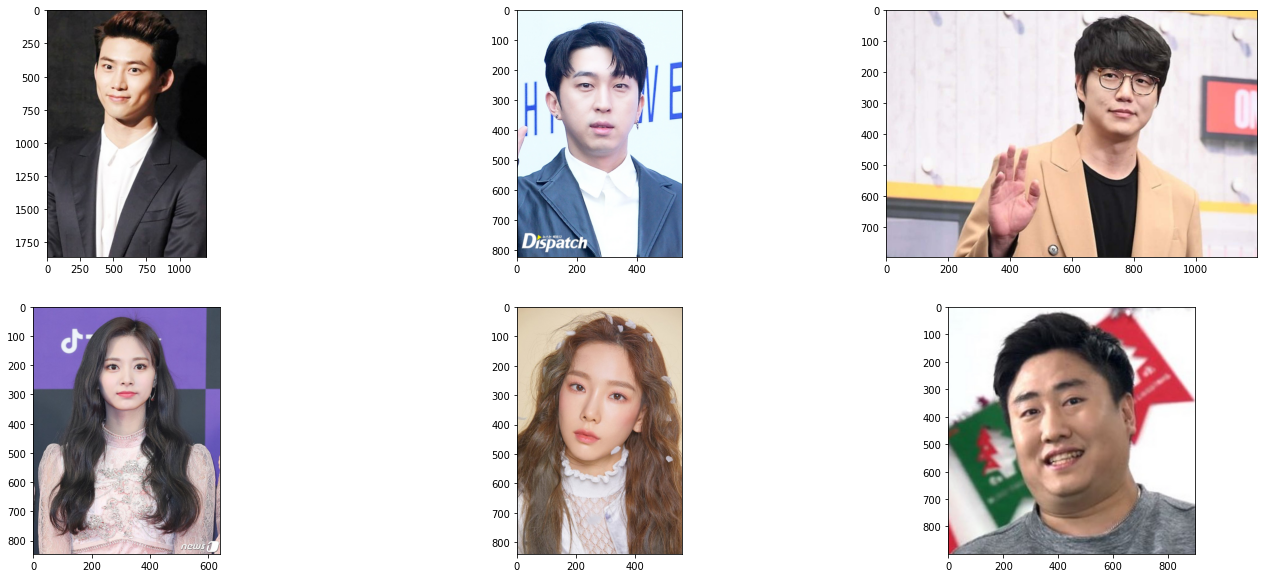

In [20]:
import os

# dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
file_path = os.getenv('HOME')+'/aiffel/face_embedding/people'

file_list = os.listdir(file_path)

print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(file_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()


### Step2. 얼굴 영역 자르기

[(142, 438, 409, 171)]


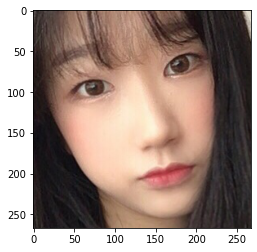

In [21]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

selfie_path = os.getenv('HOME')+'/aiffel/face_embedding/people/지예.jpg'
image = face_recognition.load_image_file(selfie_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

In [22]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

print('**')

**


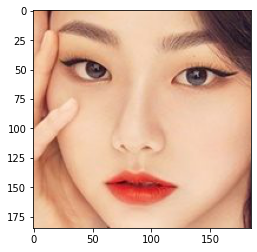

In [23]:
selfie_path = os.getenv('HOME')+'/aiffel/face_embedding/people/강미나.jpg'

cropped_face = get_cropped_face(selfie_path)
plt.imshow(cropped_face)

### Step3. 얼굴 영역의 임베딩 추출하기

In [24]:
import os

file_path = os.getenv('HOME')+'/aiffel/face_embedding/people'
file_list = os.listdir(file_path)

print('file_list: {}'.format(file_list))

file_list: ['택연.jpg', '슬리피.jpg', '성시경.jpg', '트와이스쯔위.jpg', '태연.jpg', '철면수심.jpg', '김유정.jpg', '배성재.jpg', '우기.jpg', '한기범.jpg', '돈스파이크.jpg', '장도연.jpg', '한석규.jpg', '톰 홀랜드.jpg', '서장훈.jpg', '황정민.jpg', '지예.jpg', '조정치.jpg', '카이.jpg', '사무엘 L 잭슨.jpg', '미미.jpg', '레드벨벳웬디.jpg', '성룡.jpg', '서현진.jpg', '차승원.jpg', '아이즈원김채원.jpg', '크리스탈.jpg', '김구라.jpg', '곽도원.jpg', '온앤오프와이엇.jpg', '조인성.jpg', '강미나.jpg', '온앤오프효진.jpg', '트와이스나연.jpg', '제이홉.jpg', '리사.jpg', '트와이스사나.jpg', '아이즈원민주.jpg', '슈가.jpg', '홍구.jpg', '시우민.jpg', '유재석.jpg', '숀 코네리.jpg', '케이.jpg', '박재범.jpg', '박희순.jpg', '로제.jpg', '최무성.jpg', '러블리즈예인.jpg', '서강준.jpg', '최양락.jpg', '신동엽.jpg', '정민철.jpg', '공효진.jpg', '강민경.jpg', '박정민.jpg', '박찬호.jpg', '길.jpg', '채연.jpg', '세훈.jpg', '주진모(올드).jpg', '류진.jpg', '전소미.jpg', '이승환.jpg', '정수빈.jpg', '한효주.jpg', '리아.jpg', '민니.jpg', '공유.jpg', '효정.jpg', '제이콥 배털론.jpg', '이희준.jpg', '박보검.jpg', '유아.jpg', '지수.jpg', '지코.jpg', '레인보우재경.jpg', '솔라.jpg', '사쿠라.jpg', '하현우.jpg', '크리스 햄스워스.jpg', '박휘순.jpg', '김대중.jpg', '류준열.jpg', '박보영.jpg', '박용택.jpg', '최현석.jpg'

In [25]:
image_file = os.path.join(file_path, '지예.jpg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.03263928,  0.08170748,  0.04993969, -0.0651276 , -0.11264399,
        -0.02837322, -0.11621379, -0.0707966 ,  0.13481173, -0.095676  ,
         0.1655535 , -0.04432952, -0.20490484, -0.05263706, -0.08781659,
         0.26031458, -0.16346428, -0.1665999 , -0.0497379 ,  0.0283447 ,
         0.04471289,  0.09369922,  0.04609763,  0.04254964, -0.12753886,
        -0.30963713, -0.04981716, -0.03871854, -0.05950134, -0.1077652 ,
        -0.00603132,  0.0958178 , -0.16095558,  0.03327386,  0.0542312 ,
         0.09931065, -0.03353549, -0.0748444 ,  0.16206336,  0.03284537,
        -0.34351006,  0.07378826,  0.03028941,  0.26284802,  0.22489068,
        -0.01396714,  0.02190569, -0.16098005,  0.09417482, -0.17126209,
         0.00142854,  0.13965006,  0.01493344,  0.00887429,  0.00676584,
        -0.1068975 ,  0.02195297,  0.14166588, -0.1244835 , -0.02406362,
         0.10329741, -0.07717823,  0.01755366, -0.12943624,  0.16081348,
        -0.00539557, -0.13166021, -0.20278378,  0.0

In [26]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        if os.path.isdir(img_path):  # 만약 디렉토리인 경우, 무시하고 다음 파일로 넘어감
            continue
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [27]:
selfie_embedding_dict = get_face_embedding_dict(file_path)
selfie_embedding_dict['지예']

array([-0.03263928,  0.08170748,  0.04993969, -0.0651276 , -0.11264399,
       -0.02837322, -0.11621379, -0.0707966 ,  0.13481173, -0.095676  ,
        0.1655535 , -0.04432952, -0.20490484, -0.05263706, -0.08781659,
        0.26031458, -0.16346428, -0.1665999 , -0.0497379 ,  0.0283447 ,
        0.04471289,  0.09369922,  0.04609763,  0.04254964, -0.12753886,
       -0.30963713, -0.04981716, -0.03871854, -0.05950134, -0.1077652 ,
       -0.00603132,  0.0958178 , -0.16095558,  0.03327386,  0.0542312 ,
        0.09931065, -0.03353549, -0.0748444 ,  0.16206336,  0.03284537,
       -0.34351006,  0.07378826,  0.03028941,  0.26284802,  0.22489068,
       -0.01396714,  0.02190569, -0.16098005,  0.09417482, -0.17126209,
        0.00142854,  0.13965006,  0.01493344,  0.00887429,  0.00676584,
       -0.1068975 ,  0.02195297,  0.14166588, -0.1244835 , -0.02406362,
        0.10329741, -0.07717823,  0.01755366, -0.12943624,  0.16081348,
       -0.00539557, -0.13166021, -0.20278378,  0.08877815, -0.17

#### 내 사진들끼리의 얼굴 임베딩 벡터 거리 구하기

In [28]:
def get_distance(name1, name2):
    return np.linalg.norm(selfie_embedding_dict[name1]-selfie_embedding_dict[name2], ord=2)

get_distance('지예', '지예에')

0.3164647264468552

In [29]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [30]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(selfie_embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            image_path = os.getenv('HOME')+'/aiffel/face_embedding/people/{}.jpg'.format(sorted_faces[i][0])
            cropped_face = get_cropped_face(image_path)
            plt.imshow(cropped_face)
            plt.show()

### Step4. 모은 연예인들과 비교하기

순위 1 : 이름(우기), 거리(0.2952482194908903)


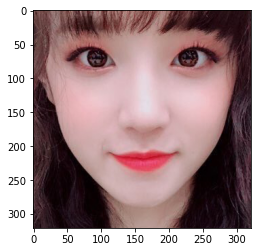

순위 2 : 이름(지예에), 거리(0.3164647264468552)


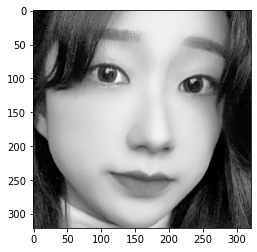

순위 3 : 이름(태연), 거리(0.37500527165316416)


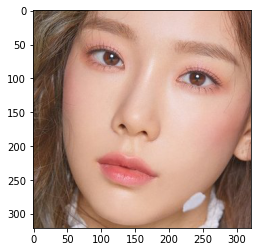

순위 4 : 이름(비니), 거리(0.4093367720866135)


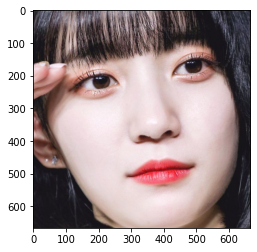

순위 5 : 이름(아이즈원김채원), 거리(0.41414848954386874)


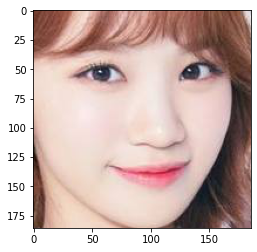

In [31]:
get_nearest_face('지예', 5)

### Step5. PCA, T-SNE 시각화

In [32]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

# MNIST 데이터 불러오기
data = load_digits()

# 2차원으로 차원 축소
n_components = 2

# t-sne 모델 생성
model = TSNE(n_components=n_components)

# 학습한 결과 2차원 공간 값 출력
print(model.fit_transform(data.data))

/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[[ 69.753075   -9.613025 ]
 [  4.5002666   9.623952 ]
 [-20.158836   10.755717 ]
 ...
 [-13.508279    1.7479101]
 [-31.477928  -22.244719 ]
 [-19.120329   -1.1723013]]


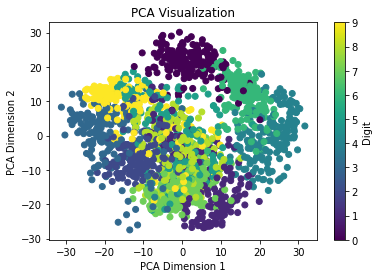

In [33]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

# MNIST 데이터 불러오기
data = load_digits()

# PCA 모델 생성
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data.data)

# 시각화
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data.target, cmap='viridis')
plt.colorbar(label='Digit')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('PCA Visualization')
plt.show()


/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


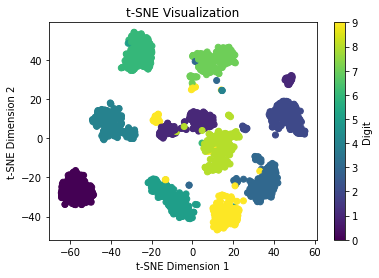

In [34]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

# MNIST 데이터 불러오기
data = load_digits()

# t-SNE 모델 생성
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(data.data)

# 시각화
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=data.target, cmap='viridis')
plt.colorbar(label='Digit')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization')
plt.show()


## 회고

이번 프로젝트에서는 대다수가 같은 에러로 토론할 수 있었다. 나는 동물을 얼굴로 인식하지 못해서 에러가 발생했었는데 일단 삭제해서 진행을 원활하게 할 수 있었다. 또한, 어떤 사진에 에러가 있는지 함수 구문에 print(file)를 통해 확인할 수 있었다.
나와 닮은 사람을 벡터 차이로 확인할 수 있었고 이미지까지 출력하는 것에 있어서는 시간이 걸렸던 것 같다.
PCA, T-SNE 시각화는 정의가 LMS에 나와 있었는데 검색을 통해(https://gaussian37.github.io/ml-concept-t_sne/) 한번 출력만 해보았다. 그래프를 해석하는 부분은 이제 알아가야 할 단계이다.
그래도 이번 주부터 프로젝트를 일주일에 두 번씩 하고 있는데 코드뿐만 아니라 이미지로도 숫자로도 결과를 확실하게 볼 수 있어서 지루하지 않아서 흥미가 생겨 다행이라고 생각한다.^^